In [ ]:
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit
#from scipy.interpolate import interp1d

def larmor_radius(KE, B, charge_mass_ratio = 9.58e7, charge_in_e = 1):
    c = 3e8
    q = (1.6e-19)*charge_in_e
    m = q/charge_mass_ratio
    E = KE+m*9e16
    p = (1/c)*np.sqrt((E**2)-((m**2)*(c**4)))
    R = p/(q*B)
    return R

def track_particle_2D(
        #input everything in SI units, except for E being in eV
        #B is in the Z direction for the 2D tracker
        Energy_eV,
        B_data = np.array([1]),
        B_axes = np.array([0]),
        theta_0 = 0,
        d_tcc = 0.5,
        delta_d = 0.001,
        IP_radius = 0.20,
        IP_center = np.array([0.10,-0.10]),
        nonuniform_B = True,
        uniform_B = 1,
        charge_mass_ratio = 9.58e7,
        charge_in_e = 1,
        curved_plate = True,
        flat_plate = False,
        custom_plate = False,
        x_max = 1,
        y_max = 1):
    #initializing variables
    E = (Energy_eV * 1.6e-19)
    x_array = []
    y_array = []
    x = 0
    y = d_tcc*math.sin(theta_0)
    theta = theta_0
    x_array.append(x)
    y_array.append(y)

    if curved_plate == False:
        i = 0
        while 0 < x < x_max and y < y_max:
            i = i+1
            if nonuniform_B == True:
                B = np.interp(x,B_axes,B_data)
            elif nonuniform_B == False:
                B = uniform_B
            R = larmor_radius(E, B, charge_mass_ratio, charge_in_e)
            if -0.25*math.pi < theta < 0.25*math.pi or 0.75*math.pi < theta < 1.25*math.pi:
                delta_x = delta_d
                delta_y = R*(math.cos(theta)-np.sqrt(1-((delta_x/R)+math.sin(theta))**2))
                theta_new = math.asin((delta_x/R)+math.sin(theta))
            elif 0.25*math.pi < theta < 0.50*math.pi:
                delta_y = delta_d
                delta_x = R*(-math.sin(theta)+np.sqrt(1-((-delta_y/R)+math.cos(theta))**2))
                theta_new = math.asin((delta_x/R)+math.sin(theta))
            elif 0.50*math.pi < theta < 0.75*math.pi or 1.25*math.pi < theta:
                delta_y = delta_d
                delta_x = R*(-math.sin(theta)-np.sqrt(1-((-delta_y/R)+math.cos(theta))**2))
                theta_new = math.pi-math.asin((delta_x/R)+math.sin(theta))
            x = x+delta_x
            y = y+delta_y
            theta = theta_new
            x_array.append(x)
            y_array.append(y)
    
    if curved_plate == True:
        i = 0
        while (((x-IP_center[0])**2)+((y-IP_center[1])**2) < IP_radius**2):
            i = i+1
            if nonuniform_B == True:
                B = np.interp(x,B_axes,B_data)
            elif nonuniform_B == False:
                B = uniform_B
            R = larmor_radius(E, B, charge_mass_ratio, charge_in_e)
            if -0.25*math.pi < theta < 0.25*math.pi or 0.75*math.pi < theta < 1.25*math.pi:
                delta_x = delta_d
                delta_y = R*(math.cos(theta)-np.sqrt(1-((delta_x/R)+math.sin(theta))**2))
                theta_new = math.asin((delta_x/R)+math.sin(theta))
            elif 0.25*math.pi < theta < 0.50*math.pi:
                delta_y = delta_d
                delta_x = R*(-math.sin(theta)+np.sqrt(1-((-delta_y/R)+math.cos(theta))**2))
                theta_new = math.asin((delta_x/R)+math.sin(theta))
            elif 0.50*math.pi < theta < 0.75*math.pi or 1.25*math.pi < theta:
                delta_y = delta_d
                delta_x = R*(-math.sin(theta)+np.sqrt(1-((-delta_y/R)+math.cos(theta))**2))
                theta_new = 0.5*math.pi+math.asin((delta_y/R)-math.cos(theta))
            x = x+delta_x
            y = y+delta_y
            theta = theta_new
            x_array.append(x)
            y_array.append(y)
            
    return np.array(x_array), np.array(y_array)




In [133]:
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit
#from scipy.interpolate import interp1d

def larmor_radius(KE, B, charge_mass_ratio = 9.58e7, charge_in_e = 1):
    c = 3e8
    q = (1.6e-19)*charge_in_e
    m = q/charge_mass_ratio
    E = KE+m*9e16
    p = (1/c)*np.sqrt((E**2)-((m**2)*(c**4)))
    R = p/(q*B)
    return R

def track_particle_2D(
        #input everything in SI units, except for E being in eV
        #B is in the Z direction for the 2D tracker
        Energy_eV,
        B_data = np.array([1]),
        B_axes = np.array([0]),
        theta_0 = 0,
        d_tcc = 0.5,
        delta_theta = 0.0005*math.pi,
        IP_radius = 0.20,
        IP_center = np.array([0.10,-0.10]),
        nonuniform_B = True,
        uniform_B = 1,
        charge_mass_ratio = 9.58e7,
        charge_in_e = 1,
        curved_plate = True,
        flat_plate = False,
        custom_plate = False,
        x_max = 1,
        y_max = 1):
    #initializing variables
    E = (Energy_eV * 1.6e-19)
    x_array = []
    y_array = []
    x = 0
    y = d_tcc*math.sin(theta_0)
    theta = theta_0
    x_array.append(x)
    y_array.append(y)



    if curved_plate == False:
        i = 0
        while 0 < x < x_max and y < y_max:
            i = i+1
            if nonuniform_B == True:
                B = np.interp(x,B_axes,B_data)
                grad_B_data = np.gradient(B_data,B_axes)
                grad_B_max = np.max(grad_B_data)
                grad_B = np.interp(x,B_axes,grad_B_data)/grad_B_max
                R_max = larmor_radius(E, np.max(B_data), charge_mass_ratio, charge_in_e)
            elif nonuniform_B == False:
                B = uniform_B
                grad_B = 1
                R_max = larmor_radius(E, uniform_B, charge_mass_ratio, charge_in_e)
            R = larmor_radius(E, B, charge_mass_ratio, charge_in_e)
            R_adjust = R/R_max
            delta_theta_adjusted = 1/(grad_B*R_adjust)
            delta_xv = R*math.sin(delta_theta_adjusted)
            delta_yv = R*(1-math.cos(delta_theta_adjusted))
            delta_x = delta_xv*math.cos(theta)-delta_yv*math.sin(theta)
            delta_y = delta_xv*math.sin(theta)+delta_yv*math.cos(theta)
            x = x+delta_x
            y = y+delta_y
            theta = theta+delta_theta
            x_array.append(x)
            y_array.append(y)
    
    if curved_plate == True:
        i = 0
        while (((x-IP_center[0])**2)+((y-IP_center[1])**2) < IP_radius**2):
            i = i+1
            i = i+1
            if nonuniform_B == True:
                B = np.interp(x,B_axes,B_data)
            elif nonuniform_B == False:
                B = uniform_B
            R = larmor_radius(E, B, charge_mass_ratio, charge_in_e)
            delta_xv = R*math.sin(delta_theta)
            delta_yv = R*(1-math.cos(delta_theta))
            delta_x = delta_xv*math.cos(theta)-delta_yv*math.sin(theta)
            delta_y = delta_xv*math.sin(theta)+delta_yv*math.cos(theta)
            x = x+delta_x
            y = y+delta_y
            theta = theta+delta_theta
            x_array.append(x)
            y_array.append(y)
            
    return np.array(x_array), np.array(y_array)




In [24]:
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit
#from scipy.interpolate import interp1d

def larmor_radius(KE, B, charge_mass_ratio = 9.58e7, charge_in_e = 1):
    c = 3e8
    q = (1.6e-19)*charge_in_e
    m = q/charge_mass_ratio
    E = KE+m*9e16
    p = (1/c)*np.sqrt((E**2)-((m**2)*(c**4)))
    R = p/(q*B)
    return R

def track_particle_2D(
        #input everything in SI units, except for E being in eV
        #B is in the Z direction for the 2D tracker
        Energy_eV,
        B_data = np.array([1]),
        B_axes = np.array([0]),
        theta_0 = 0,
        d_tcc = 0.5,
        delta_d = 0.0005,
        IP_radius = 0.20,
        IP_center = np.array([0.10,-0.10]),
        nonuniform_B = True,
        uniform_B = 1,
        charge_mass_ratio = 9.58e7,
        charge_in_e = 1,
        curved_plate = True,
        flat_plate = False,
        custom_plate = False,
        x_max = 1,
        y_max = 1,
        dynamic_step = False):
    #initializing variables
    E = (Energy_eV * 1.6e-19)
    x_array = []
    y_array = []
    x = 0
    y = d_tcc*math.sin(theta_0)
    theta = theta_0
    x_array.append(x)
    y_array.append(y)

    if dynamic_step == True:
        grad_B_data = np.gradient(B_data,B_axes)
        grad_B_max = np.max(grad_B_data)
        delta_D = delta_d

    if curved_plate == False:
        while 0 < x < x_max and y < y_max:
            if nonuniform_B == True:
                B = np.interp(x,B_axes,B_data)
                if dynamic_step == True:
                    grad_B_adj = np.interp(x,B_axes,grad_B_data)/grad_B_max
                    delta_d = delta_D*grad_B_adj
            elif nonuniform_B == False:
                B = uniform_B
                #grad_B = 1
            R = larmor_radius(E, B, charge_mass_ratio, charge_in_e)
            delta_theta_adjusted = delta_d/R
            delta_xv = R*math.sin(delta_theta_adjusted)
            delta_yv = R*(1-math.cos(delta_theta_adjusted))
            delta_x = delta_xv*math.cos(theta)-delta_yv*math.sin(theta)
            delta_y = delta_xv*math.sin(theta)+delta_yv*math.cos(theta)
            x = x+delta_x
            y = y+delta_y
            theta = theta+delta_theta_adjusted
            x_array.append(x)
            y_array.append(y)

    if curved_plate == True:
        while (((x-IP_center[0])**2)+((y-IP_center[1])**2) < IP_radius**2):
            if nonuniform_B == True:
                B = np.interp(x,B_axes,B_data)
                if dynamic_step == True:
                    grad_B_adj = np.interp(x,B_axes,grad_B_data)/grad_B_max
                    delta_d = delta_D*grad_B_adj
            elif nonuniform_B == False:
                B = uniform_B
                #grad_B = 1
            R = larmor_radius(E, B, charge_mass_ratio, charge_in_e)
            delta_theta_adjusted = delta_d/R
            delta_xv = R*math.sin(delta_theta_adjusted)
            delta_yv = R*(1-math.cos(delta_theta_adjusted))
            delta_x = delta_xv*math.cos(theta)-delta_yv*math.sin(theta)
            delta_y = delta_xv*math.sin(theta)+delta_yv*math.cos(theta)
            x = x+delta_x
            y = y+delta_y
            theta = theta+delta_theta_adjusted
            x_array.append(x)
            y_array.append(y)
            
    return np.array(x_array), np.array(y_array)




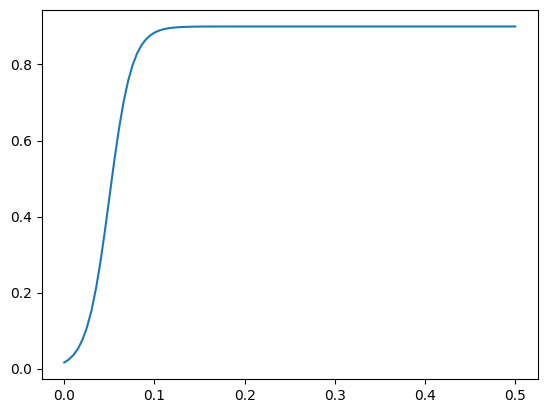

In [25]:
Baxes = np.linspace(0,0.5,100)
Bdata = 0.9*0.5*(1+np.tanh(40*(Baxes-0.05)))

IPradius = 0.14
IPcenter = np.array([0.06,-0.12])

delta = 0.

plt.plot(Baxes,Bdata)

(-0.1, 0.2)

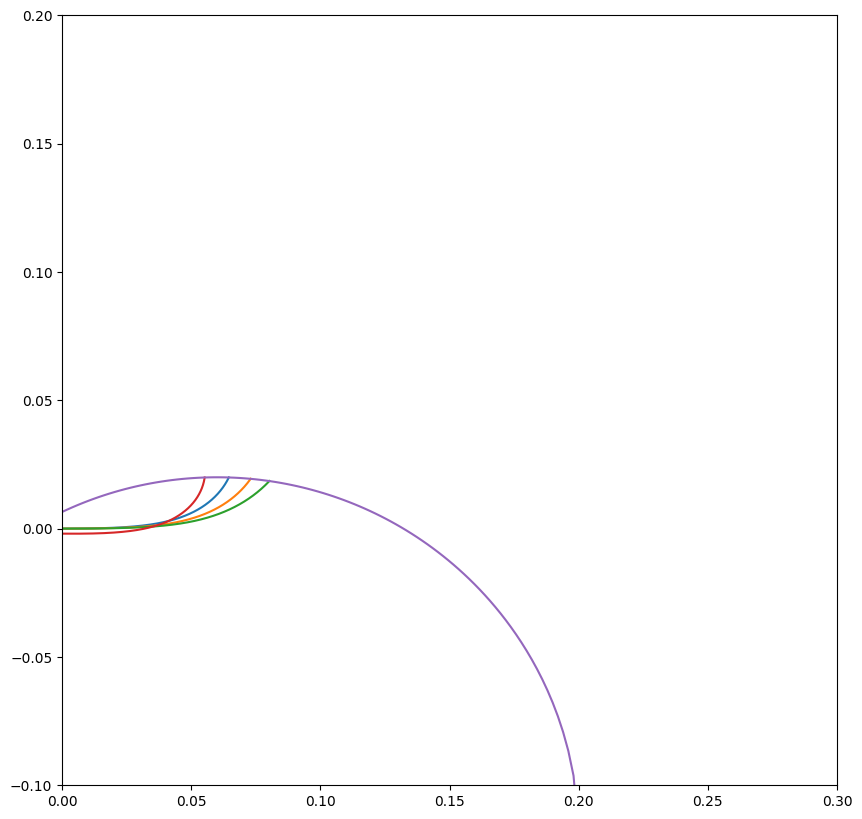

In [35]:
E = 15000

#Bdata = np.array([0.1,0.2,0.4,0.8,1,1])
#Baxes = np.array([0,0.05,0.1,0.15,0.2,0.25])

X, Y = track_particle_2D(
    E,
    B_data = Bdata,
    B_axes = Baxes,
    theta_0 = 0,
    d_tcc = 0.5,
    delta_d = 0.00005,
    IP_radius = IPradius,
    IP_center = IPcenter,
    nonuniform_B = True,
    uniform_B = 1,
    charge_mass_ratio = 9.58e7,
    charge_in_e = 1,
    curved_plate = True,
    flat_plate = False,
    custom_plate = False,
    x_max = 1,
    y_max = 1)

E = 35000

X1, Y1 = track_particle_2D(
    E,
    B_data = Bdata,
    B_axes = Baxes,
    theta_0 = 0,
    d_tcc = 0.5,
    delta_d = 0.00005,
    IP_radius = IPradius,
    IP_center = IPcenter,
    nonuniform_B = True,
    uniform_B = 1,
    charge_mass_ratio = 9.58e7,
    charge_in_e = 1,
    curved_plate = True,
    flat_plate = False,
    custom_plate = False,
    x_max = 1,
    y_max = 1)

E = 70000

X2, Y2 = track_particle_2D(
    E,
    B_data = Bdata,
    B_axes = Baxes,
    theta_0 = 0,
    d_tcc = 0.5,
    delta_d = 0.00005,
    IP_radius = IPradius,
    IP_center = IPcenter,
    nonuniform_B = True,
    uniform_B = 1,
    charge_mass_ratio = 9.58e7,
    charge_in_e = 1,
    curved_plate = True,
    flat_plate = False,
    custom_plate = False,
    x_max = 1,
    y_max = 1)

E = 5000

X3, Y3 = track_particle_2D(
    E,
    B_data = Bdata,
    B_axes = Baxes,
    theta_0 = (-0.0025*math.pi),
    d_tcc = 0.25,
    delta_d = 0.00005,
    IP_radius = IPradius,
    IP_center = IPcenter,
    nonuniform_B = True,
    uniform_B = 1,
    charge_mass_ratio = 9.58e7,
    charge_in_e = 1,
    curved_plate = True,
    flat_plate = False,
    custom_plate = False,
    x_max = 1,
    y_max = 1)

plt.figure(figsize = (10,10))
plt.plot(X,Y)
plt.plot(X1,Y1)
plt.plot(X2,Y2)
plt.plot(X3,Y3)
IP_x = np.linspace(0,0.20,100)
IP_y = -0.12+np.sqrt(0.14**2-(IP_x-0.06)**2)
plt.plot(IP_x,IP_y)
plt.xlim(0,0.3)
plt.ylim(-0.1,0.2)

(5090,)


(-0.05, 0.05)

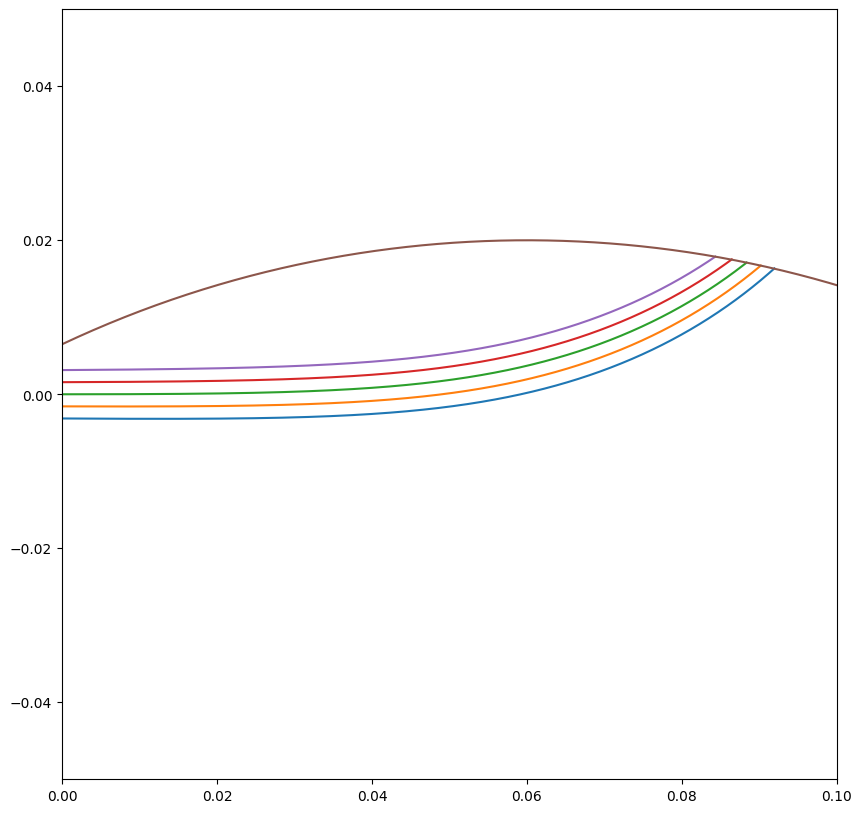

In [41]:
E = 150000

#Bdata = np.array([0.1,0.2,0.4,0.8,1,1])
#Baxes = np.array([0,0.05,0.1,0.15,0.2,0.25])

X, Y = track_particle_2D(
    E,
    B_data = Bdata,
    B_axes = Baxes,
    theta_0 = -0.002*math.pi,
    d_tcc = 0.5,
    delta_d = 0.00005,
    IP_radius = IPradius,
    IP_center = IPcenter,
    nonuniform_B = True,
    uniform_B = 1,
    charge_mass_ratio = 9.58e7,
    charge_in_e = 1,
    curved_plate = True,
    flat_plate = False,
    custom_plate = False,
    x_max = 1,
    y_max = 1)

#E = 35000

X1, Y1 = track_particle_2D(
    E,
    B_data = Bdata,
    B_axes = Baxes,
    theta_0 = -0.001*math.pi,
    d_tcc = 0.5,
    delta_d = 0.00005,
    IP_radius = IPradius,
    IP_center = IPcenter,
    nonuniform_B = True,
    uniform_B = 1,
    charge_mass_ratio = 9.58e7,
    charge_in_e = 1,
    curved_plate = True,
    flat_plate = False,
    custom_plate = False,
    x_max = 1,
    y_max = 1)

#E = 70000

X2, Y2 = track_particle_2D(
    E,
    B_data = Bdata,
    B_axes = Baxes,
    theta_0 = 0.00*math.pi,
    d_tcc = 0.5,
    delta_d = 0.00005,
    IP_radius = IPradius,
    IP_center = IPcenter,
    nonuniform_B = True,
    uniform_B = 1,
    charge_mass_ratio = 9.58e7,
    charge_in_e = 1,
    curved_plate = True,
    flat_plate = False,
    custom_plate = False,
    x_max = 1,
    y_max = 1)

#E = 5000

X3, Y3 = track_particle_2D(
    E,
    B_data = Bdata,
    B_axes = Baxes,
    theta_0 = 0.001*math.pi,
    d_tcc = 0.5,
    delta_d = 0.00005,
    IP_radius = IPradius,
    IP_center = IPcenter,
    nonuniform_B = True,
    uniform_B = 1,
    charge_mass_ratio = 9.58e7,
    charge_in_e = 1,
    curved_plate = True,
    flat_plate = False,
    custom_plate = False,
    x_max = 1,
    y_max = 1)

X4, Y4 = track_particle_2D(
    E,
    B_data = Bdata,
    B_axes = Baxes,
    theta_0 = 0.002*math.pi,
    d_tcc = 0.5,
    delta_d = 0.00005,
    IP_radius = IPradius,
    IP_center = IPcenter,
    nonuniform_B = True,
    uniform_B = 1,
    charge_mass_ratio = 9.58e7,
    charge_in_e = 1,
    curved_plate = True,
    flat_plate = False,
    custom_plate = False,
    x_max = 1,
    y_max = 1,
    dynamic_step=True
    )

print(np.shape(X4))

plt.figure(figsize = (10,10))
plt.plot(X,Y)
plt.plot(X1,Y1)
plt.plot(X2,Y2)
plt.plot(X3,Y3)
plt.plot(X4,Y4)
IP_x = np.linspace(0,0.20,100)
IP_y = -0.12+np.sqrt(0.14**2-(IP_x-0.06)**2)
plt.plot(IP_x,IP_y)
plt.xlim(0,0.1)
plt.ylim(-0.05,0.05)